In [1]:
# specify your student id and your name
id = 'W20072488'
name = 'Ciara Power'

In [2]:
# setup magic - see kmurphy.bitbucket.org/modules/Advanced_Calculus for setup instructions.
%matplotlib inline
from calculus import *
setup_practical(id, name)

Ver 0.3


# Practical 04 - Exponential and Lograthmic Functions

## Introduction


### Aim

In this practical we will focus on exponential and lograthmic functions, and solve probem similar to those in your tutorial sheets but using Python.

 
### Mathematics Concepts

 * The __exponential function__ is defined by

\\[
    f(x) = \exp(x) = {\rm e}^{x}, \qquad \mbox{for all real input}
\\]

where fundmental constant, ${\rm e}=2.71828182845904523536028747135266249775724709369995957\ldots$ 
 
     - The exponential function is useful in modelling growth/decay phenomena where the growth/decay rate is related to the size of the population (people, bacteria, cash, etc).
     
 * The __(natural) logarithmic function__ is defined as the inverse of the exponental function 
 
\\[ 
    f(x) = \ln(x) \qquad x>0
\\]
where $y=\ln(x) \iff {\rm e}^y = x$.



### Python Concepts

Python had symbolic and numerical implematations of the exponential and logarithmic functions. To access the symbolic implementation we use the __sympy__ module as usual:

    import sympy as sym

and we will make use of the following functions

 * __sym.exp(x)__ return the value of the exponential function
 * __sym.ln(x)__ return the value of the (natural) logarithmic function
 
and

 * __sys.symbols__ - Define a symbol and it properties (e.g. real)
 * __sym.solve(EXPER, x)__ - Determine the values of the variable __x__ for which the expression __EXPER__ is zero.
 * __EXPER.subs(x, value)__ - Evaluate expression __EXPER__ by replacing variable __x__ with __value__.


## Example

Bacteria increase according to the formula $N = 150 e^{1.02t}$ where $N$ is the number of bacteria and $t$ is the time in hours.

a) Plot the behaviour of the population growth over the first 5 hours.
b) How many bacteria were present at the start of the experiment?
c) How long does it take for the bacteria to double?

A sample of 3000 bacteria is placed in a dish. After 4 hours, the thermostat control breaks down and the bacteria begin to die. If the numbers decrease according to the formula $D = D_0 e^{-0.03t}$, how much longer, to the nearest minute, will it take for the number of bacteria return to the original number of 3000?


__a) Plot the behaviour of the population growth over the first 5 hours.__

Here, we import the plotting function as before and construct our plot as before.



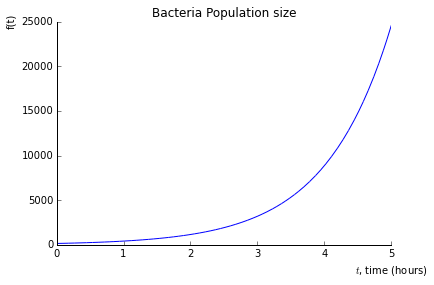

In [3]:
from sympy.plotting import plot
t = sym.symbols('t')
N = 150*sym.exp(1.02*t)
p = plot(N, (t,0,5), show=False)
p.title = "Bacteria Population size"
p.xlabel = "$t$, time (hours)"
p.show()

__b) How many bacteria were present at the start of the experiment?__

We want to evaluate $N$ when $t=0$, so use the _subs_ method i.e. "substitute"

In [4]:
N.subs(t,0)

150

__c) How long does it take for the bacteria to double?__

So, since the initial population was 150, this question is asking for what value of $t$ is $N=300$. In order words solve, for $t$, the equation
\\[
    150 e^{1.02t} = 300
\\]

OK, we can do this using the logarithmic function, but can sympy do the work for us instead? yes

First we use _sym.solve_ to find the zeros of the expression $N-300$ as follows

In [5]:
sym.solve(N-300,t)

[0.679556059372495,
 0.679556059372495 - 153.999639881853*I,
 0.679556059372495 - 147.839654286579*I,
 0.679556059372495 - 141.679668691304*I,
 0.679556059372495 - 135.51968309603*I,
 0.679556059372495 - 129.359697500756*I,
 0.679556059372495 - 123.199711905482*I,
 0.679556059372495 - 117.039726310208*I,
 0.679556059372495 - 110.879740714934*I,
 0.679556059372495 - 104.71975511966*I,
 0.679556059372495 - 98.5597695243857*I,
 0.679556059372495 - 92.3997839291116*I,
 0.679556059372495 - 86.2397983338375*I,
 0.679556059372495 - 80.0798127385634*I,
 0.679556059372495 - 73.9198271432893*I,
 0.679556059372495 - 67.7598415480151*I,
 0.679556059372495 - 61.599855952741*I,
 0.679556059372495 - 55.4398703574669*I,
 0.679556059372495 - 49.2798847621928*I,
 0.679556059372495 - 43.1198991669187*I,
 0.679556059372495 - 36.9599135716446*I,
 0.679556059372495 - 30.7999279763705*I,
 0.679556059372495 - 24.6399423810964*I,
 0.679556059372495 - 18.4799567858223*I,
 0.679556059372495 - 12.3199711905482*I,

We were expecting only one answer, but we seem to have got a lot more.  There is only one real answer (the first one) and the rest are complex solutions to the equation $N=300$. 

To get only real solutions we should have said that the variable $t$ is real. We do this as follows


In [6]:
t = sym.symbols('t', real=True)    # t is now real
N = 150*sym.exp(1.02*t)
sym.solve(N-300,t)

[0.679556059372495]

To store this solution we use array indexing ...

In [7]:
tDouble = sym.solve(N-300,t)[0]

Lets test the located value to see if $N$ is actiually 300  ...

In [8]:
N.subs(t, tDouble)

300.000000000000

## Example

A scientist starts with 100 bacteria in an experiment. After 5 days, she discovers that the population has grown to 350. 

a) Determine an equation for this bacteria population.
b) Plot the graph of the population for the first 5 days.

__a) Determine an equation for this bacteria population.__

The general formula for population growth is 
\\[
      N = N_0 * {\rm e}^{k t}
\\]
where
 * $N_0$ is the initial population size (in this example 100).
 * $k$ is the population growth rate (in this example unknown).
 * $t$ is time (in this example days).
 
We start by defining the required quantities ...

In [9]:
N0 = 100
k = sym.symbols ('k', real=True)     # growth rate
t = sym.symbols ('t', real=True)     # time (days)

N = N0 * sym.exp(k*t)


Next we use the information "5 days, she discovers that the population has grown to 350" to find $k$. In order words we solve the equation

\\[
    N = 350
\\]
where $t=5$ and $k$ is the unknown.

In [10]:
sym.solve(N.subs(t,5)-350,k)

[log(2**(4/5)*7**(1/5)/2)]

In [11]:
#OK, that looks like our answer for $k$ but lets get its floating point approximation
sym.solve(N.subs(t,5)-350,k)[0].evalf()

0.250552593699074

In [12]:
# save result for use later
kSoln = sym.solve(N.subs(t,5)-350,k)[0].evalf()

__b) Plot the graph of the population for the first 5 days.__

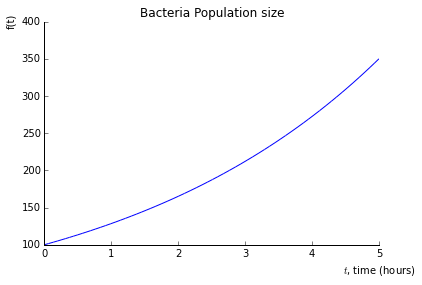

In [13]:
from sympy.plotting import plot
p = plot(N.subs(k,kSoln), (t,0,5), show=False)
p.title = "Bacteria Population size"
p.xlabel = "$t$, time (hours)"
p.axis_center = (0,100)  
p.show()

## Exercises

#### Question 1

In a given region, the number (in 1000’s) in the population aged 60 and over is expected to grow according to the equation  $P=125.5{\rm e}^{0.012t}$, where $t$ is given in years starting from 1995.

 __(a)__ If t = 0 at the beginning of 1995, calculate the population size (in 1000’s) at the beginning of 1995.

 __(b)__ Calculate the population size (in 1000’s) after 10, 30, 60, 90, 100 years.

 __(c)__ Calculate the population size (in 1000’s) at the beginning of 2005, 2025, 2055, 2095. 

 __(d)__ Graph the population for the years 1995 to 2095.



__(a) If t = 0 at the beginning of 1995, calculate the population size (in 1000’s) at the beginning of 1995.__

In [42]:

t = sym.symbols ('t', real=True)     # time (days)

P = 125.5* sym.exp(0.012*t)
print ("The population size (in 1000's) at the beginning of 1995 is %.1f"% P.subs(t,0))

The population size (in 1000's) at the beginning of 1995 is 125.5


__(b) Calculate the population size (in 1000’s) after 10, 30, 60, 90, 100 years.__

In [15]:
for tValue in [10,30,60,90,100]:
    print("The population (in 1000's) after %s years is %.2f"%(tValue,P.subs(t,tValue)))

The population (in 1000's) after 10 years is 141.50
The population (in 1000's) after 30 years is 179.88
The population (in 1000's) after 60 years is 257.83
The population (in 1000's) after 90 years is 369.56
The population (in 1000's) after 100 years is 416.67


 __(c) Calculate the population size (in 1000’s) at the beginning of 2005, 2025, 2055, 2095.__

In [16]:
for tValue in [2005,2025,2055,2095]:
    print("The population (in 1000's) at the beginning of %s years is %.2f" %(tValue,P.subs(t,tValue-1995)))

The population (in 1000's) at the beginning of 2005 years is 141.50
The population (in 1000's) at the beginning of 2025 years is 179.88
The population (in 1000's) at the beginning of 2055 years is 257.83
The population (in 1000's) at the beginning of 2095 years is 416.67


__(d) Graph the population for the years 1995 to 2095.__

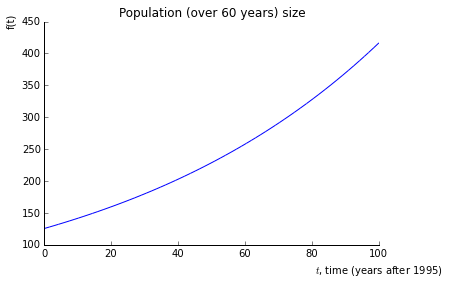

In [17]:
from sympy.plotting import plot
p = plot(P, (t,0,100), show=False)
p.title = "Population (over 60 years) size"
p.xlabel = "$t$, time (years after 1995)"
p.axis_center = (0,100)  
p.show()

#### Question 2

Students participating in a psychological experiment attended several lectures on the subject. Every month for a year after that, the students were tested to see how much of the material they remembered. The average scores for the group were given by the human memory model

\\[
    f(t)= 75-6 \ln⁡(t+1),        \qquad 0 \le t\le 12
\\]
Where $t$ is the time in months.

__(a)__ Construct the graph over the given domain.

__(b)__ Determien the number of months before the average score fell to 70%

__(c)__ Determien the number of months before the average score fell to 50%  (THIS IS A TRICK QUESTION)

__(a) Construct the graph over the given domain.__

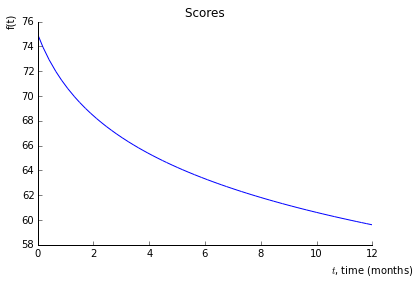

In [18]:
F=75-6*(sym.ln(t+1))
from sympy.plotting import plot
p = plot(F, (t,0,12), show=False)
p.title = "Scores "
p.xlabel = "$t$, time (months)"
p.axis_center = (0,58)  
p.show()

__(b) Determien the number of months before the average score fell to 70%__

In [19]:
FSol=sym.solve(F-70,t)[0].evalf()
print("The average score fell to 70 percent after %.2f days" % FSol)

The average score fell to 70 percent after 1.30 days


__(c) Determien the number of months before the average score fell to 50%  (THIS IS A TRICK QUESTION)__

The average score never reaches 50%, as the students were only tested for 12 months. As shown below, at 12 months, the score is at 59.61% , which is the lowest it will reach. This is shown also in the graph above.

In [20]:
FSol2=F.subs(t,12)
print("After 12 months, the average score was %.2f" % FSol2)

After 12 months, the average score was 59.61


#### Question 3

The number of milligrams of a drug in a persons system after $t$ hours is given by the function 

\\[
    D = 20{\rm e}^{-0.4t}
\\]

 __(a)__ Find the amount of the drug after 2 hours.
 
 __(b)__ Find the amount of the drug after 5 hours.
 
 __(c)__ When will the amount of the drug be 0.1 milligram (or almost completely gone from the system)?

 __(a) Find the amount of the drug after 2 hours.__

In [26]:
t = sym.symbols ('t', real=True)     # time (hours)

D = 20* sym.exp(-0.4*t)
tValue=2
print("The amount of drug left after %.0f hours is: %.4f milligrams"%(tValue,D.subs(t,tValue)))

The amount of drug left after 2 hours is: 8.9866 milligrams


 __(b) Find the amount of the drug after 5 hours.__

In [27]:
tValueb=5
print("The amount of drug left after %.0f hours is: %.4f milligrams"%(tValueb,D.subs(t,tValueb)))

The amount of drug left after 5 hours is: 2.7067 milligrams


__(c) When will the amount of the drug be 0.1 milligram (or almost completely gone from the system)?__

In [31]:
DSol=sym.solve(D-0.1,t)[0].evalf()
print("0.1 milligrams of the drug will remain in the system after %.2f hours" % DSol)

0.1 milligrams of the drug will remain in the system after 13.25 hours


#### Question 4 (Spreading of a rumour/disease in a small community)


The __logistic function__ 
\\[
   N(t) = \frac{L}{1 + C {\rm e}^{-k L t}}
\\]
where
 
  * $N(0)=N_0$ is the initial population.
  * $L$ is the limiting population, that is as $t$ get bigger and bigger  $N(t)\to L$
  * $C$ is a measure of how much room there is to grow in the population as is given by
\\[
    C= \frac{L}{N_0} - 1
\\]
  * $k$ is a positive constant representing how fast the rumour/disease spreads.
  * $t$ is time in weeks.


Consider a rumour, started by 3 people and spreading within the WIT student population (size of population, I'm guessing is 8400).  Also assume that the constant representing speed of rumour spread is $k=0.0002$.

__(a)__ Construct the graph of the number of people who have heard the rumour after $0\le t\le 10$ weeks.

__(b)__ How many weeks before 5000 student have hread the rumour?

__(c)__ How many weeks before 90% of the student population have hread the rumour?

__(a) Construct the graph of the number of people who have heard the rumour after $0\le t\le 10$ weeks.__

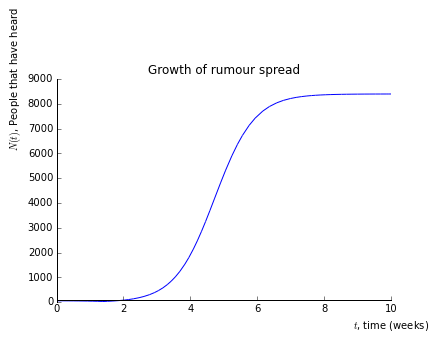

In [37]:
N0=3
k = 0.0002  # spread rate
t = sym.symbols ('t', real=True)     # time (weeks)
L=8400
C=L/N0 -1

N= L/(1+C*sym.exp(-k*L*t))


n = plot(N, (t,0,10), show=False)
n.title = "Growth of rumour spread"
n.xlabel = "$t$, time (weeks)"
n.ylabel= "$N(t)$, People that have heard"
n.axis_center = (0,100)  
n.show()


__(b) How many weeks before 5000 student have hread the rumour?__

In [38]:
NSol=sym.solve(N-5000,t)[0].evalf()
print("5000 people will have heard the rumour after %.2f weeks" % NSol)

5000 people will have heard the rumour after 4.95 weeks


__(c) How many weeks before 90% of the student population have hread the rumour?__

In [41]:
NSolb=sym.solve(N-(8400*90/100),t)[0].evalf()
print("90 percent of people will have heard the rumour after %.2f weeks" % NSolb)

90 percent of people will have heard the rumour after 6.03 weeks
